In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import numba

from clusters.percolation import Uncorrelated, Correlated
import clusters.classification

# Uncorrelated Percolation (Bernoulli)

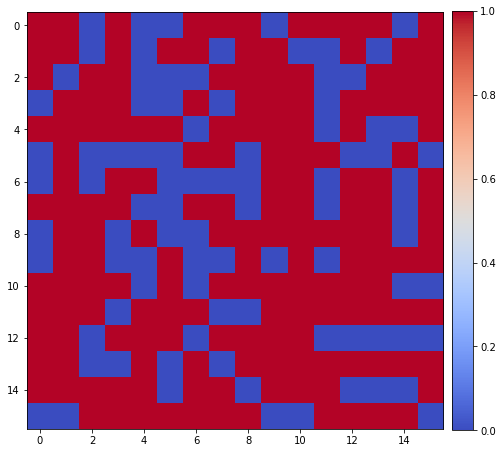

In [55]:
L = 16
surface = Uncorrelated(L, L, p=0.6)
plt.figure(figsize=(8,8))
plt.imshow(surface.sample, cmap='coolwarm')
plt.colorbar(fraction=0.047, pad=0.02)
plt.show()

In [56]:
clusters = surface.get_clusters()

In [57]:
surface.get_masses()

array([  1, 165,   1,   1], dtype=int32)

In [59]:
surface.clusters

array([[13, 13,  0, 13,  0,  0, 13, 13, 13,  0, 13, 13, 13, 13,  0, 13],
       [13, 13,  0, 13,  0, 13, 13,  0, 13, 13,  0,  0, 13,  0, 13, 13],
       [13,  0, 13, 13,  0,  0,  0, 13, 13, 13, 13,  0,  0, 13, 13, 13],
       [ 0, 13, 13, 13,  0,  0, 12,  0, 13, 13, 13,  0, 13, 13, 13, 13],
       [13, 13, 13, 13, 13, 13,  0, 13, 13, 13, 13,  0, 13,  0,  0, 13],
       [ 0, 13,  0,  0,  0,  0, 13, 13,  0, 13, 13, 13,  0,  0, 17,  0],
       [ 0, 13,  0, 13, 13,  0,  0,  0,  0, 13, 13,  0, 13, 13,  0, 13],
       [13, 13, 13, 13,  0,  0, 13, 13,  0, 13, 13,  0, 13, 13,  0, 13],
       [ 0, 13, 13,  0, 23,  0,  0, 13, 13, 13, 13, 13, 13, 13,  0, 13],
       [ 0, 13, 13,  0,  0, 13,  0,  0, 13,  0, 13,  0, 13, 13, 13, 13],
       [13, 13, 13, 13,  0, 13,  0, 13, 13, 13, 13, 13, 13, 13,  0,  0],
       [13, 13, 13,  0, 13, 13, 13,  0,  0, 13, 13, 13, 13, 13, 13, 13],
       [13, 13,  0, 13, 13, 13,  0, 13, 13, 13, 13,  0,  0,  0,  0,  0],
       [13, 13,  0,  0, 13,  0, 13,  0, 13, 13, 13,

In [9]:
from matplotlib import cm
from matplotlib.colors import ListedColormap

coolwarm = cm.get_cmap('coolwarm')
newcolors = coolwarm(np.random.uniform(0, 1, surface.tot_clusters+1))
black = np.array([0, 0, 0, 1])
newcolors[0, :] = black
newcmp = ListedColormap(newcolors)

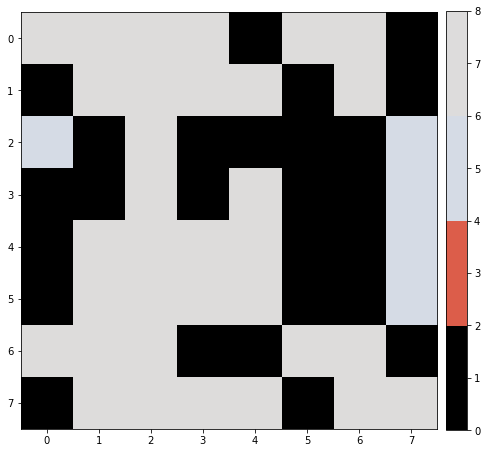

In [10]:
plt.figure(figsize=(8,8))
plt.imshow(clusters, cmap=newcmp)
plt.colorbar(fraction=0.047, pad=0.02)
plt.show()

# Correlated Percolation (Uniform or Gaussian)

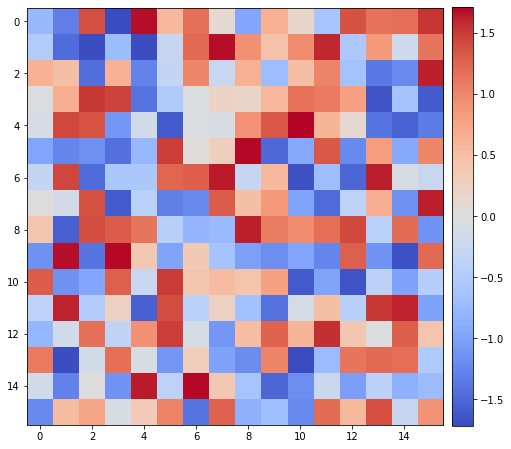

In [11]:
L = 16
u_surface = Correlated(L, L, type='uniform')  # or type='gaussian'
plt.figure(figsize=(8,8))
plt.imshow(u_surface.sample, cmap='coolwarm')
plt.colorbar(fraction=0.047, pad=0.02)

Calculating size L = 512...
Done! Plotting...
Calculating size L = 1024...
Done! Plotting...


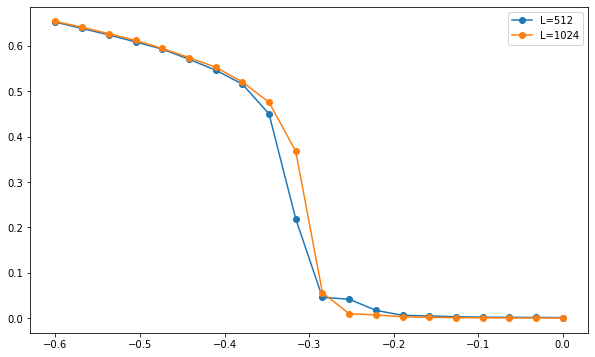

In [71]:
sizes = [512, 1024]
n_samples = 100
plt.figure(figsize=(10,6))

for L in sizes:
    print(f'Calculating size L = {L}...')
    unif_surface = Correlated(L, L, type='uniform')
    levels = np.linspace(-0.6,0,20)
    results = []
    for h in levels:
        max_masses = []
        for _ in range(n_samples):
            clusters = unif_surface.get_clusters(h)
            masses = unif_surface.get_masses()
            max_masses.append(np.max(masses))
        results.append(np.mean(max_masses)/L**2)
#        errors.append(np.std(max_masses)/np.sqrt(L*n_samples))
    print('Done! Plotting...')
    plt.plot(levels, results, '-o', label=f'L={L}')
    plt.legend()

In [111]:
from collections import Counter

L = 512
gauss_surf = Correlated(L,L,type='uniform', H=-1)


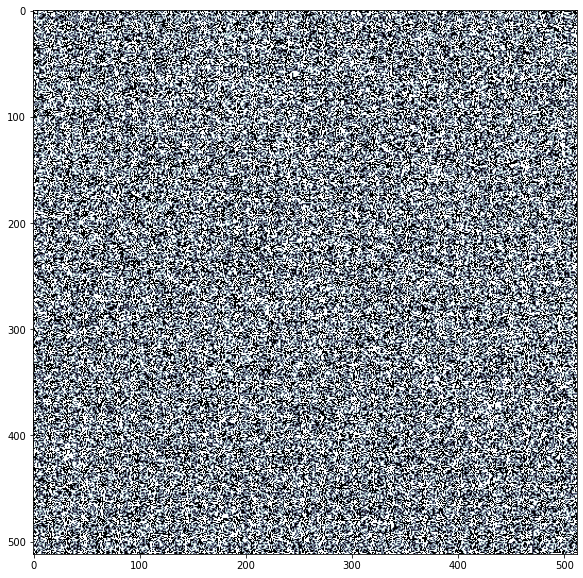

In [112]:
clust = gauss_surf.get_clusters(h=-0.1)
big_index, big_mass = Counter(clust.flatten()).most_common()[0]
big_cluster = (clust == big_index).astype(int)
plt.figure(figsize=(10,10))
plt.imshow(big_cluster, cmap='bone_r')

In [96]:
from scipy.special import erfc
0.5*erfc(-0.001/np.sqrt(2))

0.500398942213911